# Face Recognition using Convolutional neural networks
### By Amirreza Shamsolhodaei

# Step 1:
## Packages

In [3]:
import keras
from keras.models import Sequential #Stacking The Layers
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam #Adam Optimizer
from keras.utils import np_utils #numpy utilities
from keras.callbacks import TensorBoard

import numpy as np #linear Algebra
import pandas as pd #Data Processing
import tensorflow as tf #tensorflow
import matplotlib.pyplot as plt #Plotting the result
import itertools #Functions creating iterators for efficient looping
 
from sklearn.model_selection import train_test_split #Skit Learn Library for machine Learning, Splitting Train and Test Datasets
from google.colab import files
%matplotlib inline

# Step 2:
## Loading the dataset

In [4]:
Dataset = np.load("/content/ORL_faces.npz")
Dataset.files

['testY', 'testX', 'trainX', 'trainY']

In [5]:
#Loading train images
x_train = Dataset['trainX']
#Normalizing train images
x_train = np.array(x_train,dtype='float32') / 255

#Loading test images
x_test = Dataset['testX']
#Normalizing test images
x_test = np.array(x_test,dtype='float32') / 255

#Loading the label of the images
y_train = Dataset['trainY']
y_test = Dataset['testY']

In [6]:
print('training images shape: \t', x_train.shape)
print('training labels shape: \t', y_train.shape)
print('test images shape: \t', x_test.shape)
print('test labels shape: \t', y_test.shape)


training images shape: 	 (240, 10304)
training labels shape: 	 (240,)
test images shape: 	 (160, 10304)
test labels shape: 	 (160,)


In [7]:
#Showing the train and test data formats
print('training images: \n', x_train)
print('test images: \n', x_test)
print('training labels shape: \n', y_train)
print('test labels shape: \n', y_test)

training images: 
 [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
test images: 
 [[0.16078432 0.18431373 0.18431373 ... 0.13725491 0.14509805 0.14901961]
 [0.17254902 0.16862746 0.1254902  ... 0.16862746 0.16862746 0.14509805]
 [0.16470589 0.16078432 0.17254902 ... 0.16470589 0.16862746 0.16078432]
 ...
 [0.39607844 0.39215687 0.40392157 ... 0.12156863 0.15686275 0.16470589]
 [0.4117647  0.42352942 0.41568628 ... 0.17254902 0.15686275 0.18431373]
 [0.44313726 0.44705883 0.43529412 ... 0.24313726 0.31764707 0.34901962]]
training labels shape: 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  


## Showing the images
commented because of Github's restrictions

In [34]:
"""
X = np.reshape(Dataset['trainX'], (240, 112, 92))
Y = Dataset['trainY']
X_test = np.reshape(Dataset['testX'], (160, 112, 92))
Y_test = Dataset['testY']
"""

"\nX = np.reshape(Dataset['trainX'], (240, 112, 92))\nY = Dataset['trainY']\nX_test = np.reshape(Dataset['testX'], (160, 112, 92))\nY_test = Dataset['testY']\n"

In [36]:
"""
def show_images(images):
    n = len(images)
    for i in range(n):
        plt.figure()
        plt.imshow(images[i])
"""

'\ndef show_images(images):\n    n = len(images)\n    for i in range(n):\n        plt.figure()\n        plt.imshow(images[i])\n'

 Training Images

In [37]:
#show_images(X)

 Test images

In [38]:
#show_images(X_test)

# Step 3:
## Data Validation and Reshaping the images

In [8]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=0.05, random_state=1234)

In [9]:
image_shape = (112, 92, 1)
batch_size = 512
x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *image_shape)

print('x_train shape: ',y_train.shape[0])
print('x_test shape: ',y_test.shape)

x_train shape:  228
x_test shape:  (160,)


## Step 4:
## Creating CNN model

In [14]:
model= Sequential([
    Conv2D(filters = 36, kernel_size = 7, strides = (1, 1), padding='valid', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    AveragePooling2D(pool_size=2),
    Conv2D(filters = 54, kernel_size = 5, strides = (1, 1), padding='valid', activation = 'relu', kernel_initializer='glorot_uniform', input_shape = image_shape),
    AveragePooling2D(pool_size=2),
    Flatten(),
    Dense(units = 2024, activation='relu'),
    Dropout(0.5),
    Dense(units = 1024, activation='relu'),
    Dropout(0.5),
    Dense(units = 512, activation='relu'),
    Dropout(0.5),
    Dense(units = 20, activation='softmax')  
])

model.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = Adam(learning_rate = 0.0001), 
    metrics= ['accuracy']
)

Model's parameters

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
average_pooling2d (AveragePo (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

# Step 5
### Training the model

In [23]:
training = model.fit(
    np.array(x_train), np.array(y_train), batch_size = 512,
    epochs = 250, verbose = 2, 
    validation_data = (np.array(x_valid), np.array(y_valid)),
)

Epoch 1/250
1/1 - 7s - loss: 1.9121 - accuracy: 0.4737 - val_loss: 1.7789 - val_accuracy: 0.5833
Epoch 2/250
1/1 - 7s - loss: 1.8965 - accuracy: 0.4298 - val_loss: 1.7096 - val_accuracy: 0.5833
Epoch 3/250
1/1 - 6s - loss: 1.8702 - accuracy: 0.4430 - val_loss: 1.6638 - val_accuracy: 0.5833
Epoch 4/250
1/1 - 7s - loss: 1.8382 - accuracy: 0.3816 - val_loss: 1.6334 - val_accuracy: 0.5833
Epoch 5/250
1/1 - 6s - loss: 1.7878 - accuracy: 0.4561 - val_loss: 1.6013 - val_accuracy: 0.5833
Epoch 6/250
1/1 - 6s - loss: 1.7153 - accuracy: 0.4649 - val_loss: 1.5552 - val_accuracy: 0.5833
Epoch 7/250
1/1 - 6s - loss: 1.7017 - accuracy: 0.4693 - val_loss: 1.4853 - val_accuracy: 0.5833
Epoch 8/250
1/1 - 7s - loss: 1.6429 - accuracy: 0.5132 - val_loss: 1.3883 - val_accuracy: 0.5833
Epoch 9/250
1/1 - 7s - loss: 1.5869 - accuracy: 0.5439 - val_loss: 1.2993 - val_accuracy: 0.6667
Epoch 10/250
1/1 - 6s - loss: 1.5051 - accuracy: 0.5307 - val_loss: 1.2278 - val_accuracy: 0.6667
Epoch 11/250
1/1 - 7s - loss:

In [24]:
Evaluation = model.evaluate(np.array(x_test), np.array(y_test), verbose = 0)
print('test loss:' , Evaluation[0])
print('test accuracy:', Evaluation[1])

test loss: 0.37049832940101624
test accuracy: 0.918749988079071


In [25]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


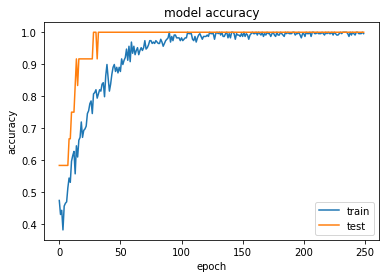

In [39]:
#History for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

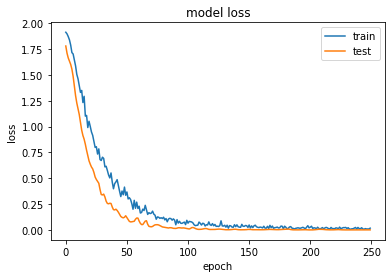

In [29]:
#history for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()